# Employee Attrition Prediction & Well-being Enhancement

``` r
library(data.table)
library(dplyr)
```

    ## 
    ## Attaching package: 'dplyr'

    ## The following objects are masked from 'package:data.table':
    ## 
    ##     between, first, last

    ## The following objects are masked from 'package:stats':
    ## 
    ##     filter, lag

    ## The following objects are masked from 'package:base':
    ## 
    ##     intersect, setdiff, setequal, union

``` r
library(VIM)
```

    ## Loading required package: colorspace

    ## Loading required package: grid

    ## VIM is ready to use.

    ## Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues

    ## 
    ## Attaching package: 'VIM'

    ## The following object is masked from 'package:datasets':
    ## 
    ##     sleep

``` r
library(DT)
library(gridExtra)
```

    ## 
    ## Attaching package: 'gridExtra'

    ## The following object is masked from 'package:dplyr':
    ## 
    ##     combine

``` r
library(ggplot2)
library(caret)
```

    ## Loading required package: lattice

``` r
library(Metrics)
```

    ## 
    ## Attaching package: 'Metrics'

    ## The following objects are masked from 'package:caret':
    ## 
    ##     precision, recall

``` r
library(randomForest)
```

    ## randomForest 4.7-1.1

    ## Type rfNews() to see new features/changes/bug fixes.

    ## 
    ## Attaching package: 'randomForest'

    ## The following object is masked from 'package:ggplot2':
    ## 
    ##     margin

    ## The following object is masked from 'package:gridExtra':
    ## 
    ##     combine

    ## The following object is masked from 'package:dplyr':
    ## 
    ##     combine

``` r
library(pROC)
```

    ## Type 'citation("pROC")' for a citation.

    ## 
    ## Attaching package: 'pROC'

    ## The following object is masked from 'package:Metrics':
    ## 
    ##     auc

    ## The following object is masked from 'package:colorspace':
    ## 
    ##     coords

    ## The following objects are masked from 'package:stats':
    ## 
    ##     cov, smooth, var

``` r
library(e1071)
#library(dtree)
library(corrplot)
```

    ## corrplot 0.92 loaded

``` r
library(DMwR2)
```

    ## Registered S3 method overwritten by 'quantmod':
    ##   method            from
    ##   as.zoo.data.frame zoo

    ## 
    ## Attaching package: 'DMwR2'

    ## The following object is masked from 'package:VIM':
    ## 
    ##     kNN

``` r
myData <- fread('./WA_Fn-UseC_-HR-Employee-Attrition.csv',sep = ',',header = TRUE,stringsAsFactors = TRUE)
```

``` r
names(myData)
```

    ##  [1] "Age"                      "Attrition"               
    ##  [3] "BusinessTravel"           "DailyRate"               
    ##  [5] "Department"               "DistanceFromHome"        
    ##  [7] "Education"                "EducationField"          
    ##  [9] "EmployeeCount"            "EmployeeNumber"          
    ## [11] "EnvironmentSatisfaction"  "Gender"                  
    ## [13] "HourlyRate"               "JobInvolvement"          
    ## [15] "JobLevel"                 "JobRole"                 
    ## [17] "JobSatisfaction"          "MaritalStatus"           
    ## [19] "MonthlyIncome"            "MonthlyRate"             
    ## [21] "NumCompaniesWorked"       "Over18"                  
    ## [23] "OverTime"                 "PercentSalaryHike"       
    ## [25] "PerformanceRating"        "RelationshipSatisfaction"
    ## [27] "StandardHours"            "StockOptionLevel"        
    ## [29] "TotalWorkingYears"        "TrainingTimesLastYear"   
    ## [31] "WorkLifeBalance"          "YearsAtCompany"          
    ## [33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
    ## [35] "YearsWithCurrManager"

``` r
glimpse(myData)
```

    ## Rows: 1,470
    ## Columns: 35
    ## $ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
    ## $ Attrition                <fct> Yes, No, Yes, No, No, No, No, No, No, No, No,…
    ## $ BusinessTravel           <fct> Travel_Rarely, Travel_Frequently, Travel_Rare…
    ## $ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
    ## $ Department               <fct> Sales, Research & Development, Research & Dev…
    ## $ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
    ## $ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
    ## $ EducationField           <fct> Life Sciences, Life Sciences, Other, Life Sci…
    ## $ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
    ## $ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
    ## $ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
    ## $ Gender                   <fct> Female, Male, Male, Female, Male, Male, Femal…
    ## $ HourlyRate               <int> 94, 61, 92, 56, 40, 79, 81, 67, 44, 94, 84, 4…
    ## $ JobInvolvement           <int> 3, 2, 2, 3, 3, 3, 4, 3, 2, 3, 4, 2, 3, 3, 2, …
    ## $ JobLevel                 <int> 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, …
    ## $ JobRole                  <fct> Sales Executive, Research Scientist, Laborato…
    ## $ JobSatisfaction          <int> 4, 2, 3, 3, 2, 4, 1, 3, 3, 3, 2, 3, 3, 4, 3, …
    ## $ MaritalStatus            <fct> Single, Married, Single, Married, Married, Si…
    ## $ MonthlyIncome            <int> 5993, 5130, 2090, 2909, 3468, 3068, 2670, 269…
    ## $ MonthlyRate              <int> 19479, 24907, 2396, 23159, 16632, 11864, 9964…
    ## $ NumCompaniesWorked       <int> 8, 1, 6, 1, 9, 0, 4, 1, 0, 6, 0, 0, 1, 0, 5, …
    ## $ Over18                   <fct> Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, …
    ## $ OverTime                 <fct> Yes, No, Yes, Yes, No, No, Yes, No, No, No, N…
    ## $ PercentSalaryHike        <int> 11, 23, 15, 11, 12, 13, 20, 22, 21, 13, 13, 1…
    ## $ PerformanceRating        <int> 3, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, …
    ## $ RelationshipSatisfaction <int> 1, 4, 2, 3, 4, 3, 1, 2, 2, 2, 3, 4, 4, 3, 2, …
    ## $ StandardHours            <int> 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 8…
    ## $ StockOptionLevel         <int> 0, 1, 0, 0, 1, 0, 3, 1, 0, 2, 1, 0, 1, 1, 0, …
    ## $ TotalWorkingYears        <int> 8, 10, 7, 8, 6, 8, 12, 1, 10, 17, 6, 10, 5, 3…
    ## $ TrainingTimesLastYear    <int> 0, 3, 3, 3, 3, 2, 3, 2, 2, 3, 5, 3, 1, 2, 4, …
    ## $ WorkLifeBalance          <int> 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, …
    ## $ YearsAtCompany           <int> 6, 10, 0, 8, 2, 7, 1, 1, 9, 7, 5, 9, 5, 2, 4,…
    ## $ YearsInCurrentRole       <int> 4, 7, 0, 7, 2, 7, 0, 0, 7, 7, 4, 5, 2, 2, 2, …
    ## $ YearsSinceLastPromotion  <int> 0, 1, 0, 3, 2, 3, 0, 0, 1, 7, 0, 0, 4, 1, 0, …
    ## $ YearsWithCurrManager     <int> 5, 7, 0, 0, 2, 6, 0, 0, 8, 7, 3, 8, 3, 2, 3, …

``` r
summary(myData)
```

    ##       Age        Attrition            BusinessTravel   DailyRate     
    ##  Min.   :18.00   No :1233   Non-Travel       : 150   Min.   : 102.0  
    ##  1st Qu.:30.00   Yes: 237   Travel_Frequently: 277   1st Qu.: 465.0  
    ##  Median :36.00              Travel_Rarely    :1043   Median : 802.0  
    ##  Mean   :36.92                                       Mean   : 802.5  
    ##  3rd Qu.:43.00                                       3rd Qu.:1157.0  
    ##  Max.   :60.00                                       Max.   :1499.0  
    ##                                                                      
    ##                   Department  DistanceFromHome   Education    
    ##  Human Resources       : 63   Min.   : 1.000   Min.   :1.000  
    ##  Research & Development:961   1st Qu.: 2.000   1st Qu.:2.000  
    ##  Sales                 :446   Median : 7.000   Median :3.000  
    ##                               Mean   : 9.193   Mean   :2.913  
    ##                               3rd Qu.:14.000   3rd Qu.:4.000  
    ##                               Max.   :29.000   Max.   :5.000  
    ##                                                               
    ##           EducationField EmployeeCount EmployeeNumber   EnvironmentSatisfaction
    ##  Human Resources : 27    Min.   :1     Min.   :   1.0   Min.   :1.000          
    ##  Life Sciences   :606    1st Qu.:1     1st Qu.: 491.2   1st Qu.:2.000          
    ##  Marketing       :159    Median :1     Median :1020.5   Median :3.000          
    ##  Medical         :464    Mean   :1     Mean   :1024.9   Mean   :2.722          
    ##  Other           : 82    3rd Qu.:1     3rd Qu.:1555.8   3rd Qu.:4.000          
    ##  Technical Degree:132    Max.   :1     Max.   :2068.0   Max.   :4.000          
    ##                                                                                
    ##     Gender      HourlyRate     JobInvolvement    JobLevel    
    ##  Female:588   Min.   : 30.00   Min.   :1.00   Min.   :1.000  
    ##  Male  :882   1st Qu.: 48.00   1st Qu.:2.00   1st Qu.:1.000  
    ##               Median : 66.00   Median :3.00   Median :2.000  
    ##               Mean   : 65.89   Mean   :2.73   Mean   :2.064  
    ##               3rd Qu.: 83.75   3rd Qu.:3.00   3rd Qu.:3.000  
    ##               Max.   :100.00   Max.   :4.00   Max.   :5.000  
    ##                                                              
    ##                       JobRole    JobSatisfaction  MaritalStatus MonthlyIncome  
    ##  Sales Executive          :326   Min.   :1.000   Divorced:327   Min.   : 1009  
    ##  Research Scientist       :292   1st Qu.:2.000   Married :673   1st Qu.: 2911  
    ##  Laboratory Technician    :259   Median :3.000   Single  :470   Median : 4919  
    ##  Manufacturing Director   :145   Mean   :2.729                  Mean   : 6503  
    ##  Healthcare Representative:131   3rd Qu.:4.000                  3rd Qu.: 8379  
    ##  Manager                  :102   Max.   :4.000                  Max.   :19999  
    ##  (Other)                  :215                                                 
    ##   MonthlyRate    NumCompaniesWorked Over18   OverTime   PercentSalaryHike
    ##  Min.   : 2094   Min.   :0.000      Y:1470   No :1054   Min.   :11.00    
    ##  1st Qu.: 8047   1st Qu.:1.000               Yes: 416   1st Qu.:12.00    
    ##  Median :14236   Median :2.000                          Median :14.00    
    ##  Mean   :14313   Mean   :2.693                          Mean   :15.21    
    ##  3rd Qu.:20462   3rd Qu.:4.000                          3rd Qu.:18.00    
    ##  Max.   :26999   Max.   :9.000                          Max.   :25.00    
    ##                                                                          
    ##  PerformanceRating RelationshipSatisfaction StandardHours StockOptionLevel
    ##  Min.   :3.000     Min.   :1.000            Min.   :80    Min.   :0.0000  
    ##  1st Qu.:3.000     1st Qu.:2.000            1st Qu.:80    1st Qu.:0.0000  
    ##  Median :3.000     Median :3.000            Median :80    Median :1.0000  
    ##  Mean   :3.154     Mean   :2.712            Mean   :80    Mean   :0.7939  
    ##  3rd Qu.:3.000     3rd Qu.:4.000            3rd Qu.:80    3rd Qu.:1.0000  
    ##  Max.   :4.000     Max.   :4.000            Max.   :80    Max.   :3.0000  
    ##                                                                           
    ##  TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany  
    ##  Min.   : 0.00     Min.   :0.000         Min.   :1.000   Min.   : 0.000  
    ##  1st Qu.: 6.00     1st Qu.:2.000         1st Qu.:2.000   1st Qu.: 3.000  
    ##  Median :10.00     Median :3.000         Median :3.000   Median : 5.000  
    ##  Mean   :11.28     Mean   :2.799         Mean   :2.761   Mean   : 7.008  
    ##  3rd Qu.:15.00     3rd Qu.:3.000         3rd Qu.:3.000   3rd Qu.: 9.000  
    ##  Max.   :40.00     Max.   :6.000         Max.   :4.000   Max.   :40.000  
    ##                                                                          
    ##  YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager
    ##  Min.   : 0.000     Min.   : 0.000          Min.   : 0.000      
    ##  1st Qu.: 2.000     1st Qu.: 0.000          1st Qu.: 2.000      
    ##  Median : 3.000     Median : 1.000          Median : 3.000      
    ##  Mean   : 4.229     Mean   : 2.188          Mean   : 4.123      
    ##  3rd Qu.: 7.000     3rd Qu.: 3.000          3rd Qu.: 7.000      
    ##  Max.   :18.000     Max.   :15.000          Max.   :17.000      
    ## 

``` r
apply(is.na(myData), 2, sum)
```

    ##                      Age                Attrition           BusinessTravel 
    ##                        0                        0                        0 
    ##                DailyRate               Department         DistanceFromHome 
    ##                        0                        0                        0 
    ##                Education           EducationField            EmployeeCount 
    ##                        0                        0                        0 
    ##           EmployeeNumber  EnvironmentSatisfaction                   Gender 
    ##                        0                        0                        0 
    ##               HourlyRate           JobInvolvement                 JobLevel 
    ##                        0                        0                        0 
    ##                  JobRole          JobSatisfaction            MaritalStatus 
    ##                        0                        0                        0 
    ##            MonthlyIncome              MonthlyRate       NumCompaniesWorked 
    ##                        0                        0                        0 
    ##                   Over18                 OverTime        PercentSalaryHike 
    ##                        0                        0                        0 
    ##        PerformanceRating RelationshipSatisfaction            StandardHours 
    ##                        0                        0                        0 
    ##         StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
    ##                        0                        0                        0 
    ##          WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
    ##                        0                        0                        0 
    ##  YearsSinceLastPromotion     YearsWithCurrManager 
    ##                        0                        0

``` r
VIM::aggr(myData)
```

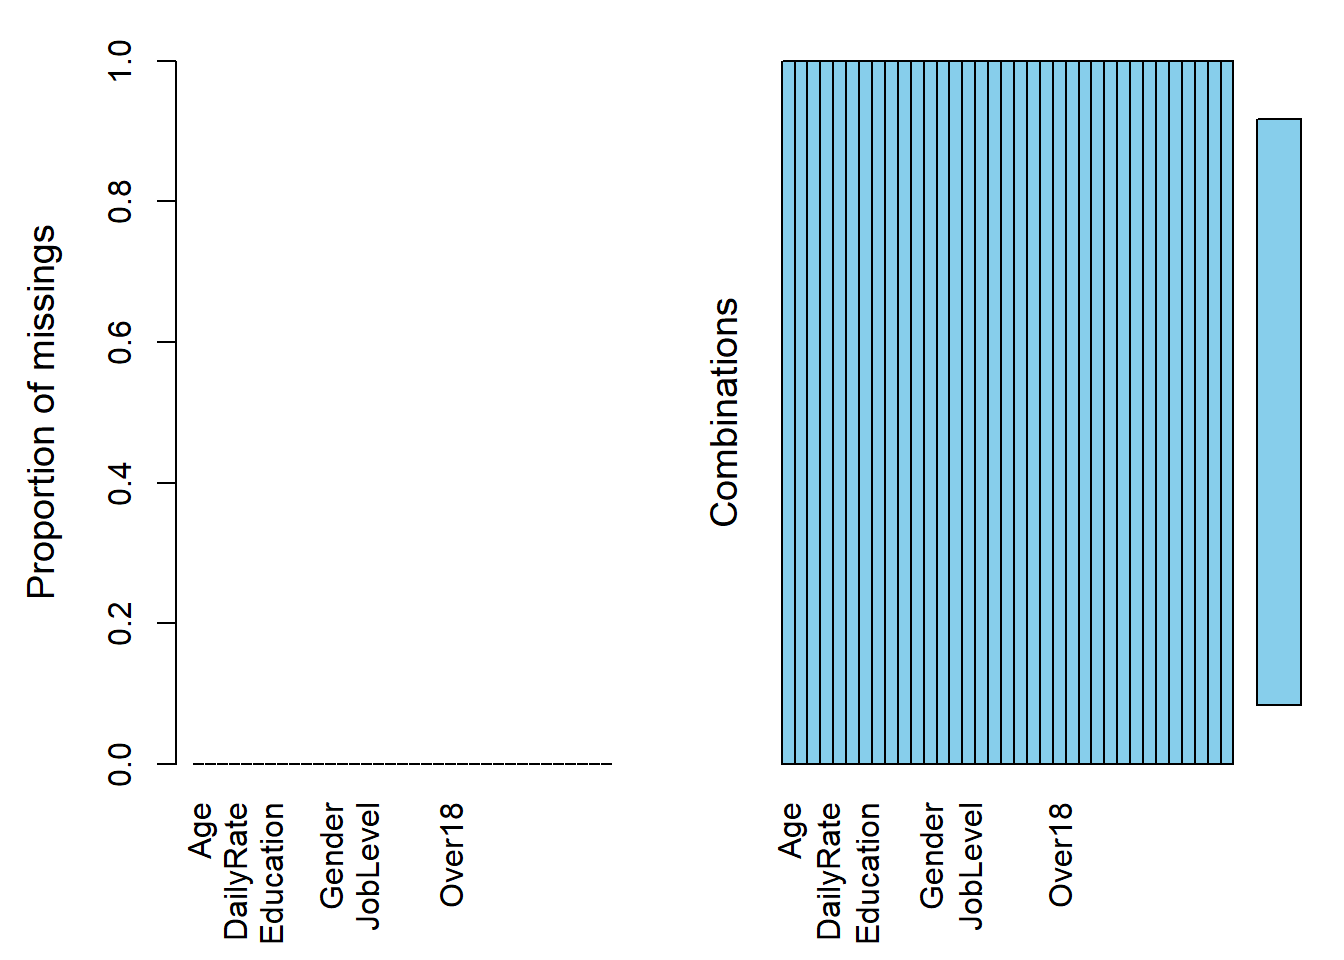

``` r
cat("Data Set has ",dim(myData)[1], " Rows and ", dim(myData)[2], " Columns" )
```

    ## Data Set has  1470  Rows and  35  Columns

``` r
myData$EmployeeNumber<- NULL
myData$StandardHours <- NULL
myData$Over18 <- NULL
myData$EmployeeCount <- NULL
cat("Data Set has ",dim(myData)[1], " Rows and ", dim(myData)[2], " Columns" )
```

    ## Data Set has  1470  Rows and  31  Columns

Checking for Duplicate Record

``` r
sum (is.na(duplicated(myData)))
```

    ## [1] 0

Integer Variables -\> Cateogorial Variables

``` r
myData$Education <- factor(myData$Education)
myData$EnvironmentSatisfaction <- factor(myData$EnvironmentSatisfaction)
myData$JobInvolvement <- factor(myData$JobInvolvement)
myData$JobLevel <- factor(myData$JobLevel)
myData$JobSatisfaction <- factor(myData$JobSatisfaction)
myData$PerformanceRating <- factor(myData$PerformanceRating)
myData$RelationshipSatisfaction <- factor(myData$RelationshipSatisfaction)
myData$StockOptionLevel <- factor(myData$StockOptionLevel)
myData$WorkLifeBalance <- factor(myData$WorkLifeBalance)
```

``` r
myData %>%
        group_by(Attrition) %>%
        tally() %>%
        ggplot(aes(x = Attrition, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Attrition", y="Count of Attriation")+
        ggtitle("Attrition")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))
```

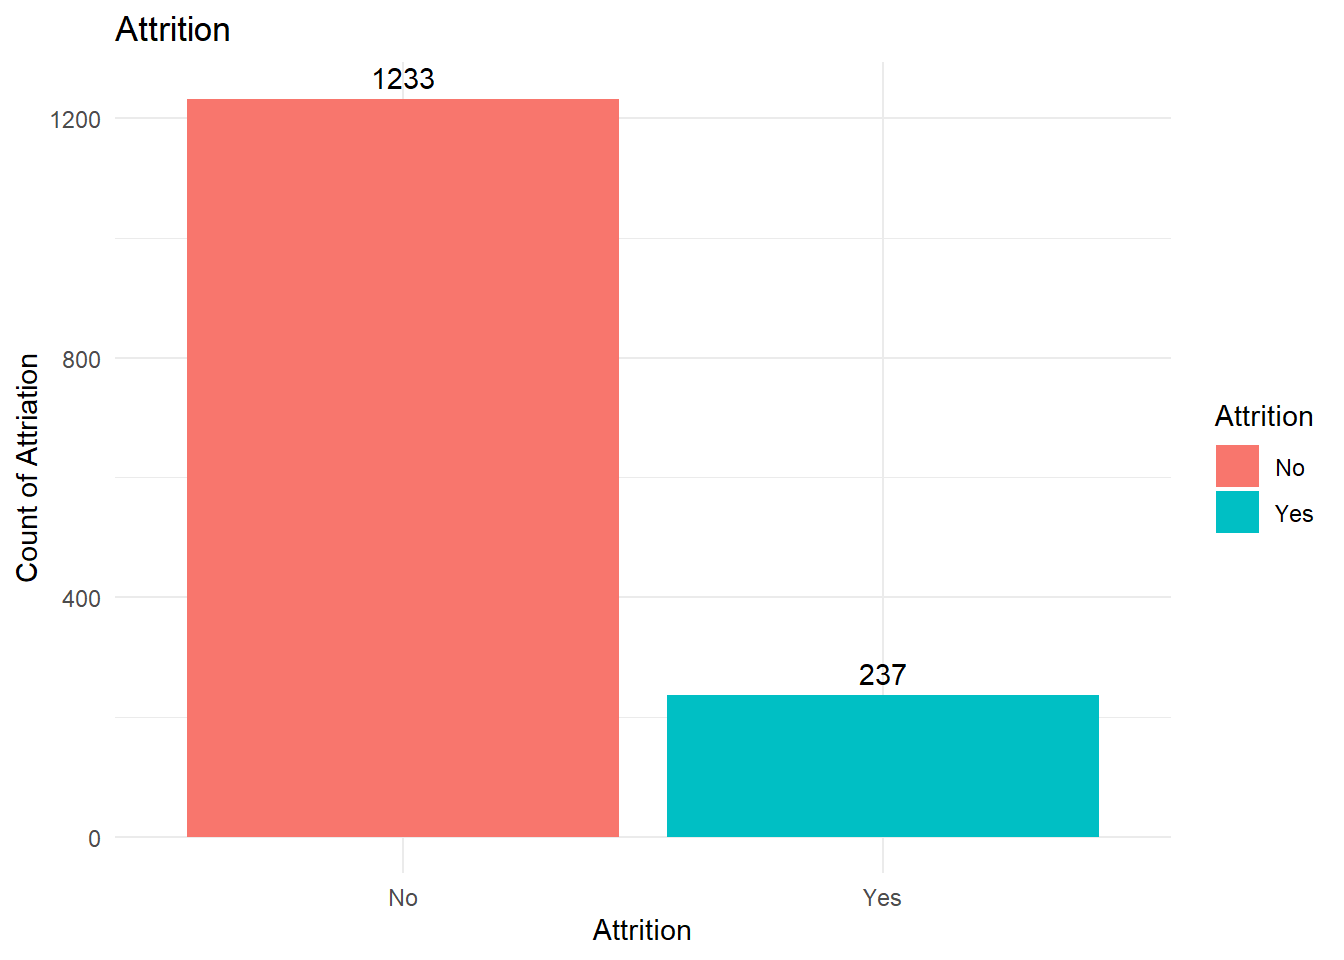 As we see here, 237/1470=0.16 % of the data label shows
the “Yes” in Attrition. this problem should be handeled during the
process because unbalanced dataset will bias the prediction model
towards the more common class (here is ‘NO’).

``` r
ggplot(data=myData, aes(myData$Age)) + 
        geom_histogram(breaks=seq(20, 50, by=2), 
                       col="red", 
                       aes(fill=..count..))+
        labs(x="Age", y="Count")+
        scale_fill_gradient("Count", low="green", high="red")
```

    ## Warning: The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
    ## ℹ Please use `after_stat(count)` instead.

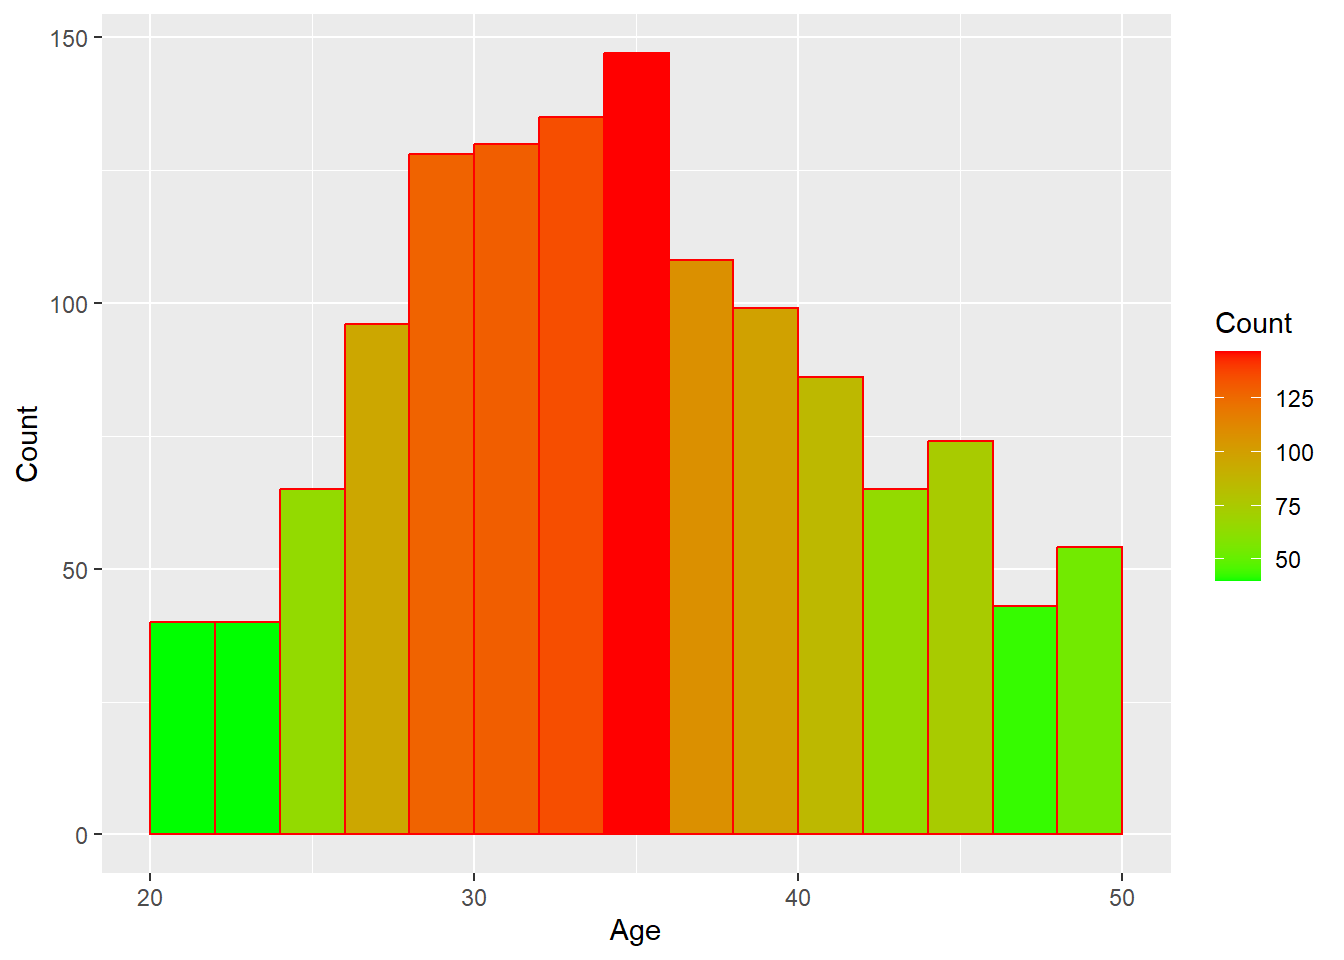 As we see above, the majority of employees are between
28-36 years. 34-36 years old are very popolar.

``` r
a1 <- myData %>%
        group_by(BusinessTravel) %>%
        tally() %>%
        ggplot(aes(x = BusinessTravel, y = n,fill=BusinessTravel)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Business Travel", y="Number Attriation")+
        ggtitle("Attrition according to the Business Travel")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))

a2<- myData %>%
        group_by(BusinessTravel, Attrition) %>%
        tally() %>%
        ggplot(aes(x = BusinessTravel, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        labs(x="Business Travel", y="Number Attriation")+
        ggtitle("Attrition according to the Business Travel")+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))


grid.arrange(a1,a2)
```

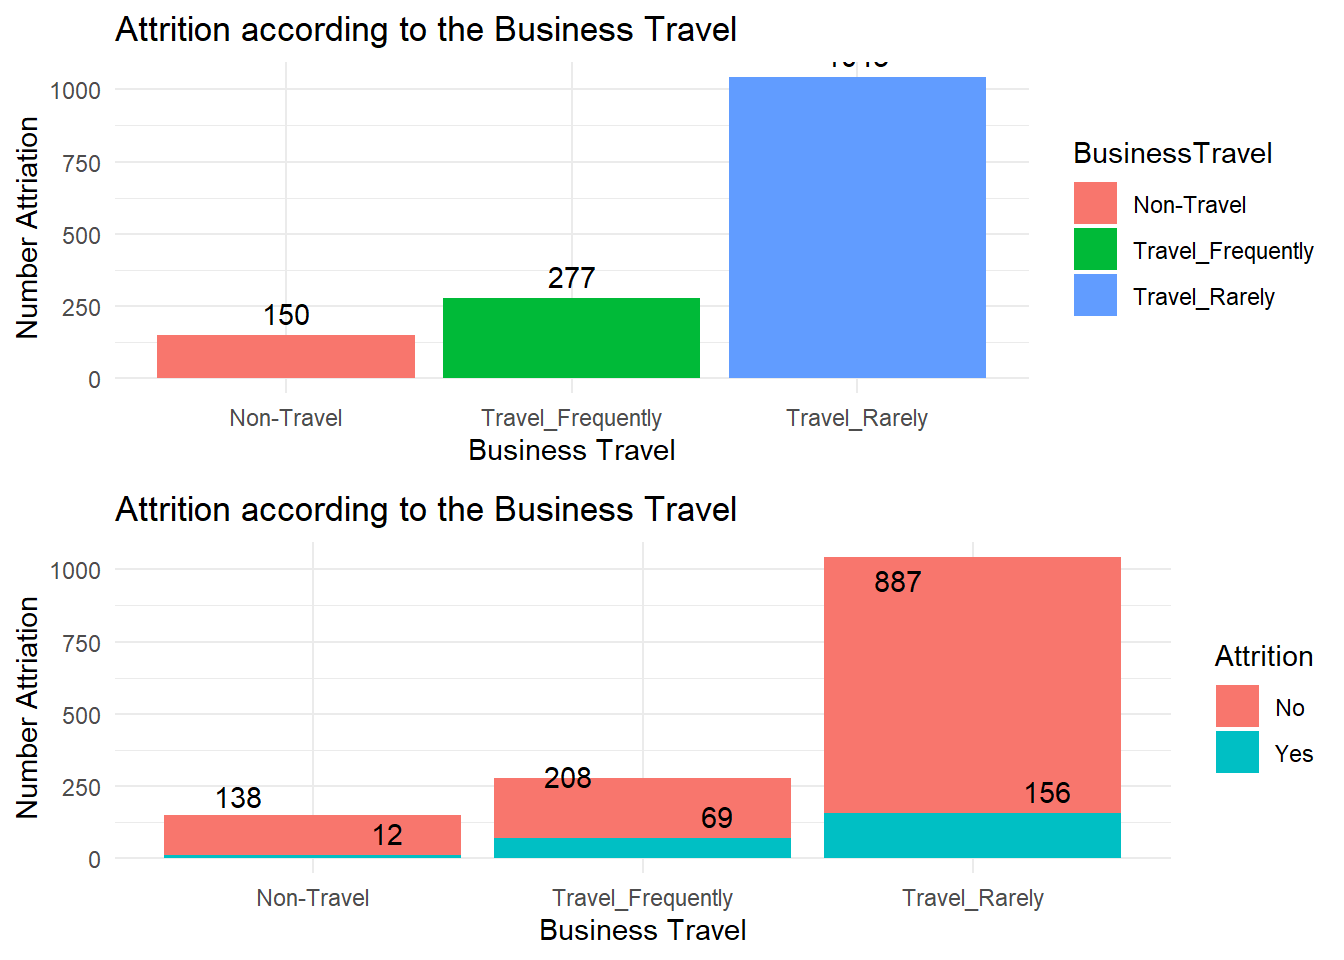 The distribution of the data according to the Business
Tralvel situation. more than 70% of employees travel rarely where just
10 % of them has no travel.

``` r
myData %>%
        ggplot(aes(x = BusinessTravel, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = 2) +
        labs(y = "Percentage", fill= "business Travel") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")
```

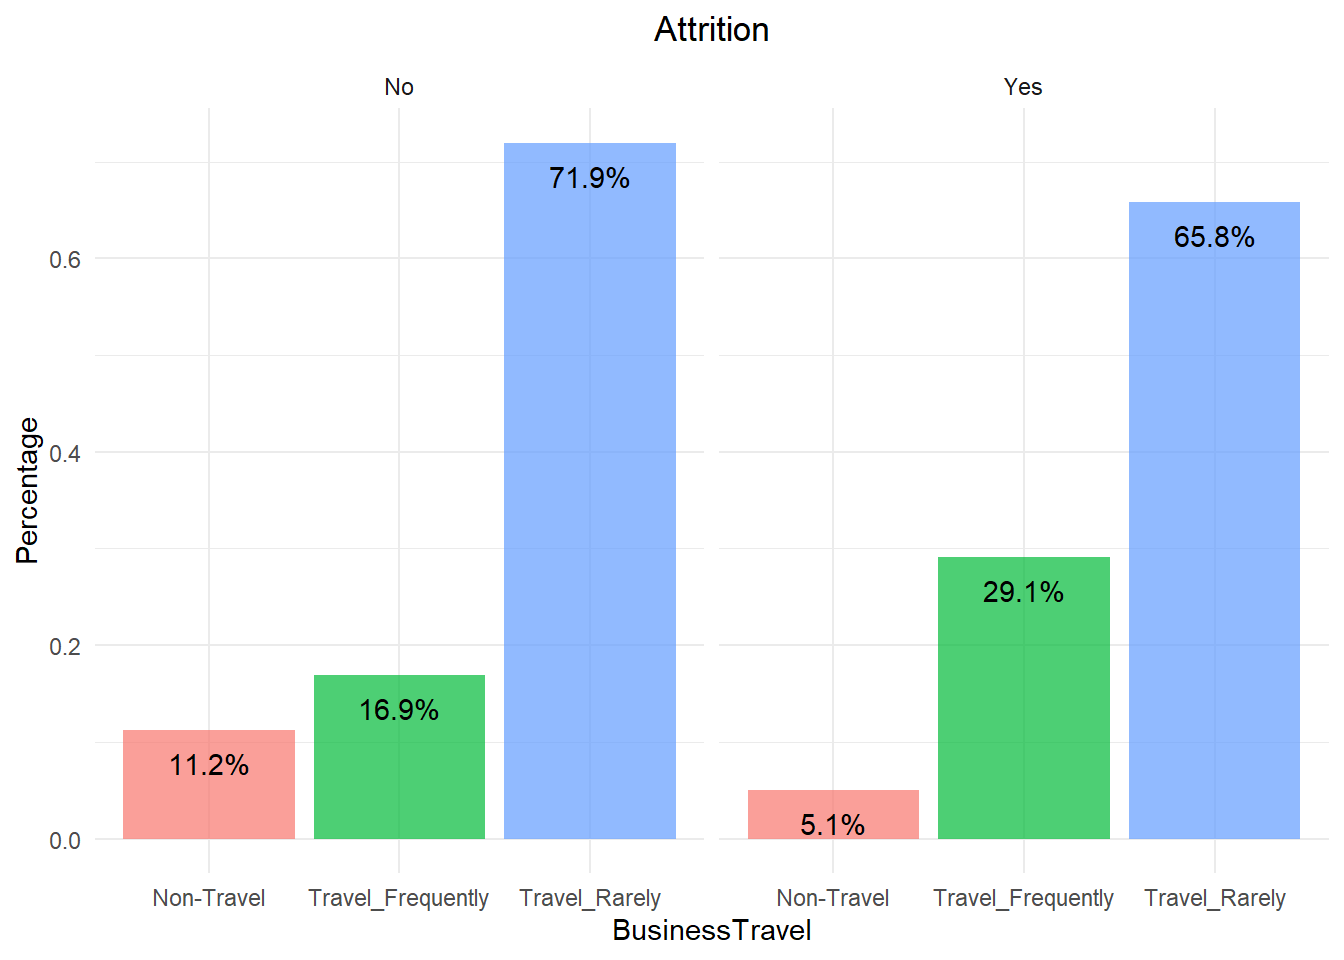

``` r
g1 <- myData %>%
        group_by(Department) %>%
        tally() %>%
        ggplot(aes(x = Department, y = n,fill=Department)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.1, position = position_dodge(0.9))

g2 <- myData %>%
        group_by(Department, Attrition) %>%
        tally() %>%
        ggplot(aes(x = Department, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.1, position = position_dodge(0.9))

grid.arrange(g1,g2)
```

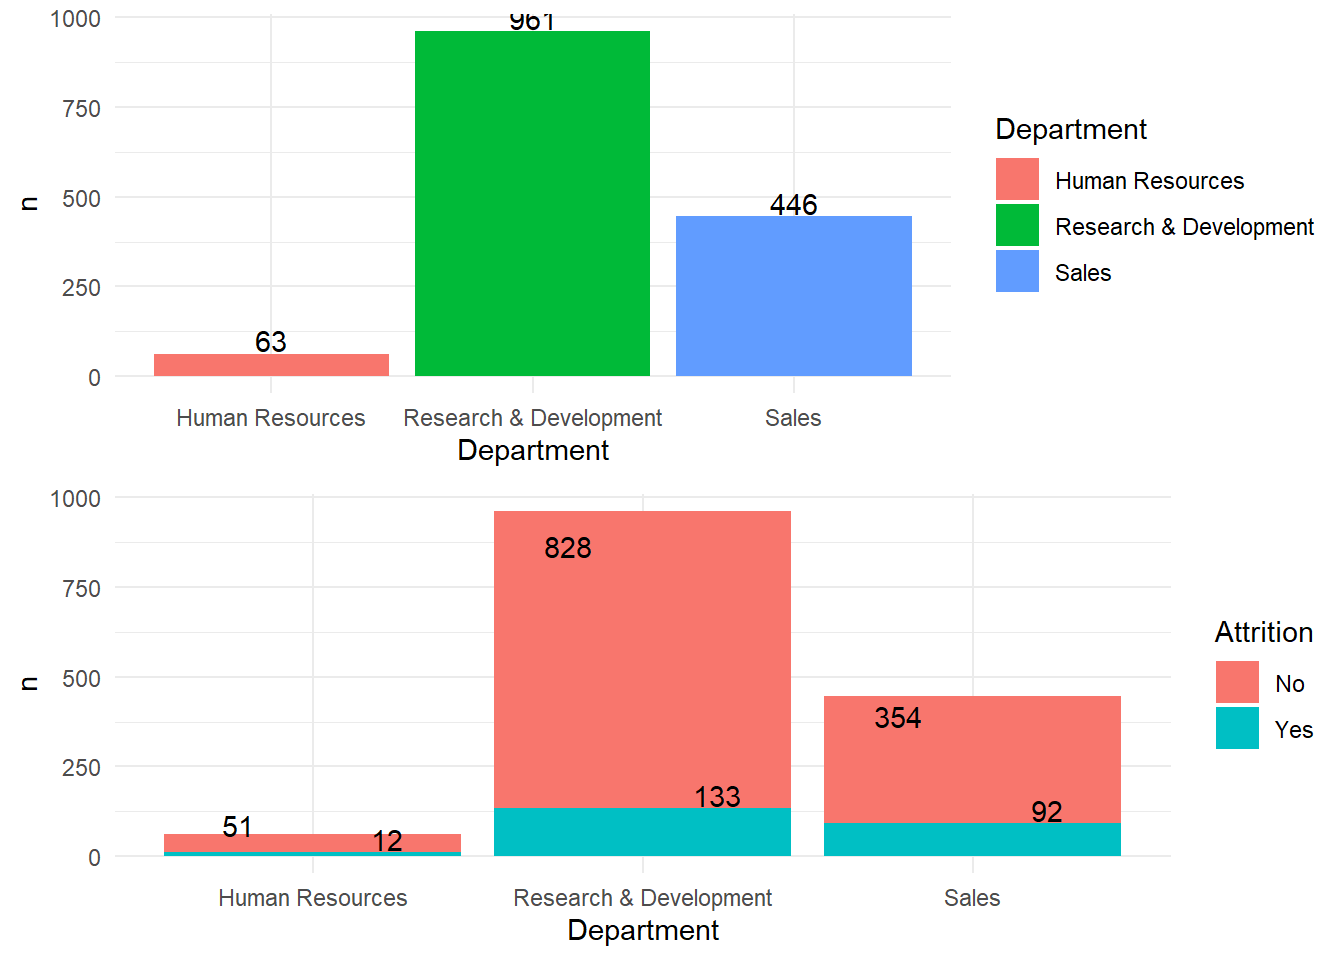

``` r
g1<- myData %>%
        ggplot(aes(x = Education, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = 2) +
        labs(y = "Percentage", fill= "Education") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

g2<- myData %>%
        group_by(Education, Attrition) %>%
        tally() %>%
        ggplot(aes(x = Education, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))+
        labs(x="Education", y="Number Attriation")+
        ggtitle("Attrition in regards to Education Level")

grid.arrange(g1,g2)
```

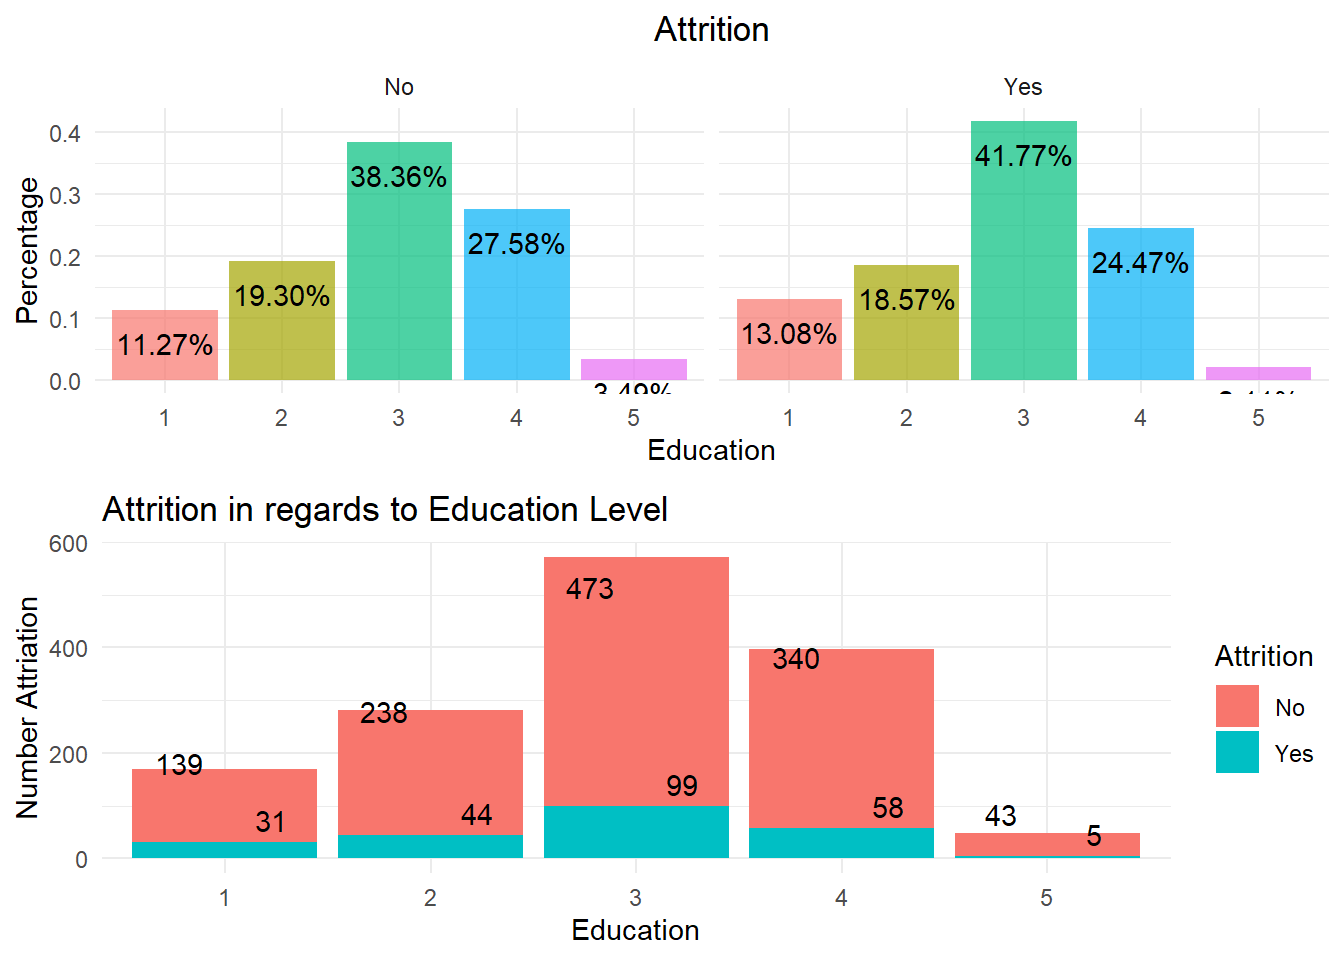

``` r
myData %>%
        ggplot(aes(x = Gender, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = -.5) +
        labs(y = "Percentage", fill= "Gender") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")
```

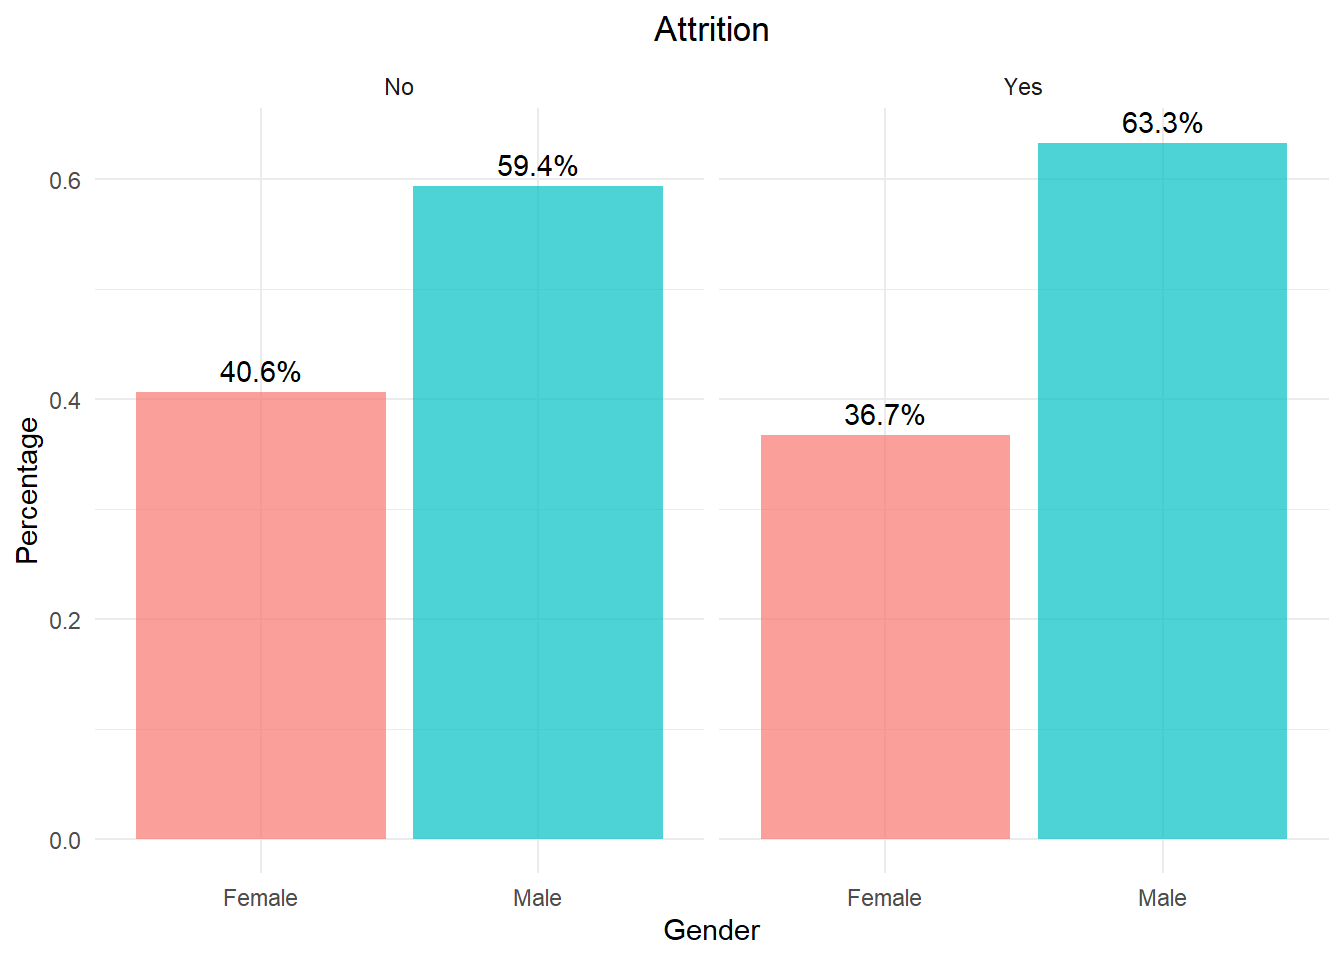

``` r
myData %>%
        ggplot(aes(x = MaritalStatus, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = -.5) +
        labs(y = "Percentage", fill= "MaritalStatus") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")
```

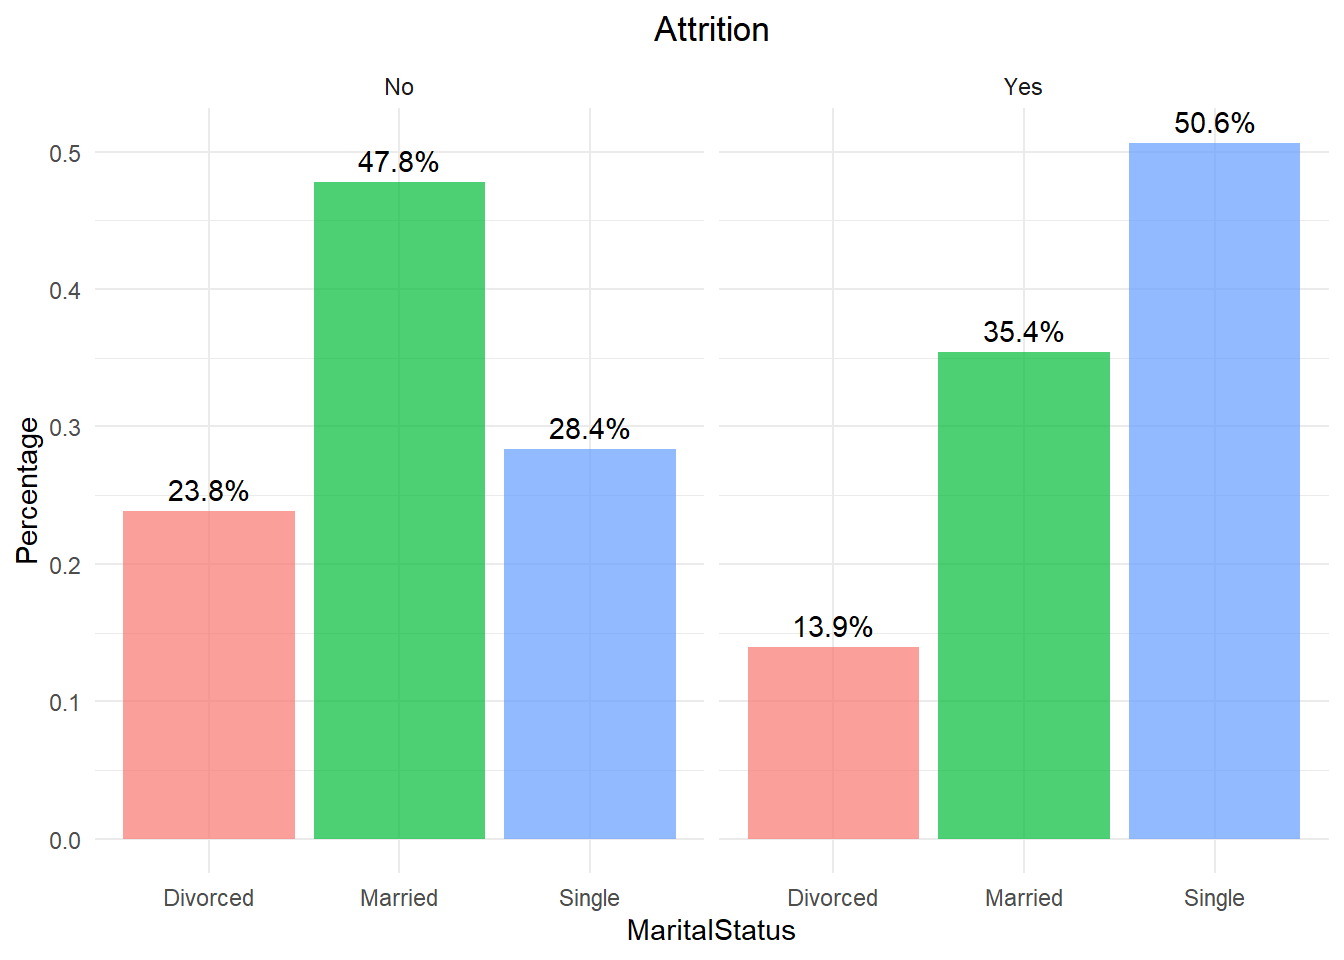

``` r
myData %>%
        ggplot(mapping = aes(x = MonthlyIncome)) + 
        geom_histogram(aes(fill = Attrition), bins=20)+
        labs(x="Monthlt Income", y="Number Attriation")+
        ggtitle("Attrition in regards to Monthly Income")
```

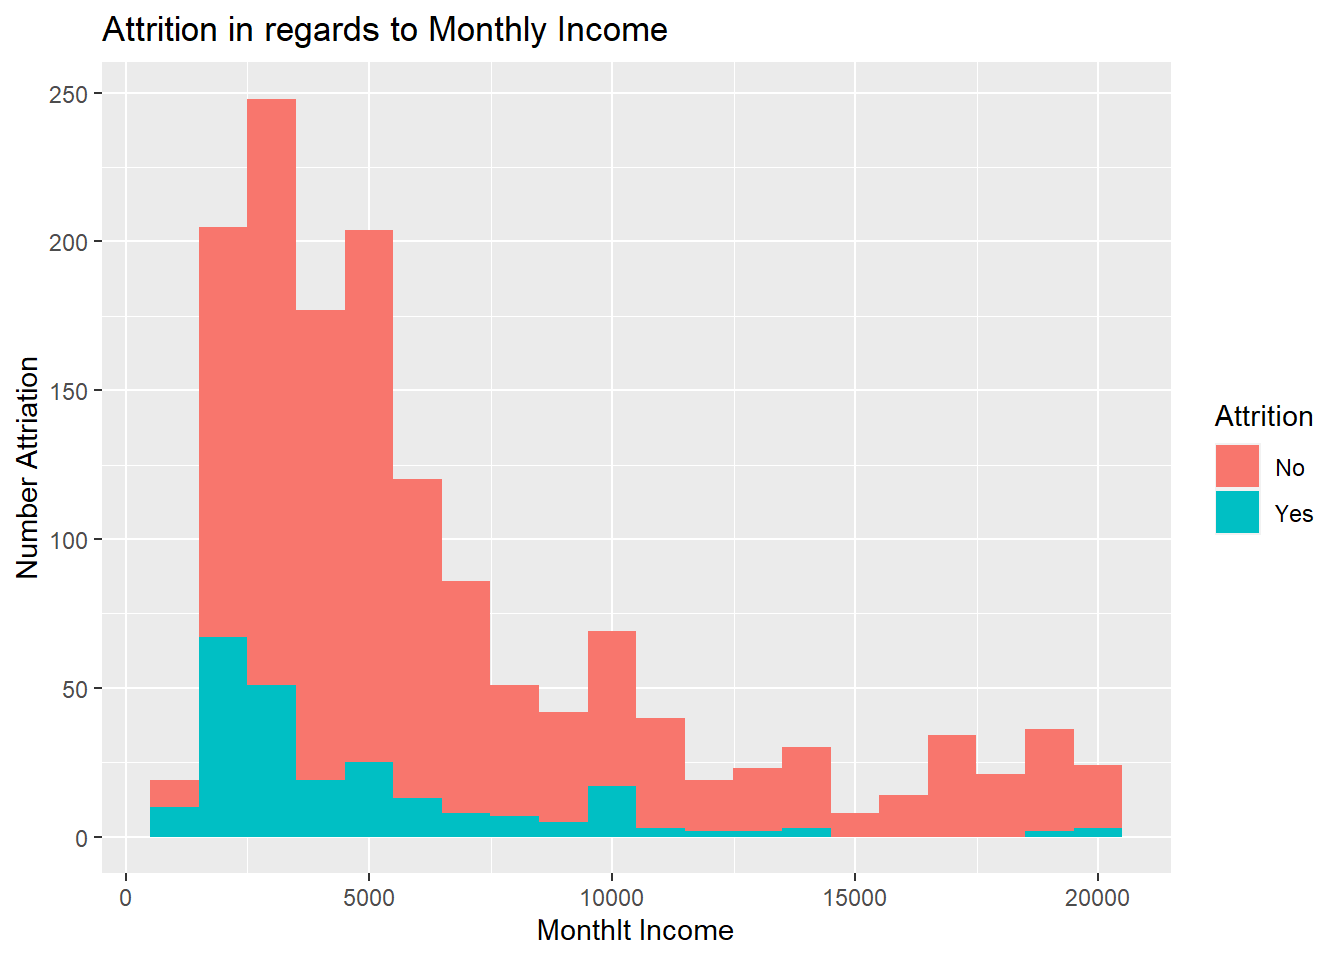

``` r
g1 <-myData %>%
        ggplot(aes(x = OverTime, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = 0.3) +
        labs(y = "Percentage", fill= "OverTime") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.3)) + 
        ggtitle("Attrition")


g2 <-myData %>%
        group_by(OverTime, Attrition) %>%
        tally() %>%
        ggplot(aes(x = OverTime, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.3, position = position_dodge(0.9))+
        labs(x="Over time", y="Number Attriation")+
        ggtitle("Attrition in regards to Over time")

grid.arrange(g1,g2)
```

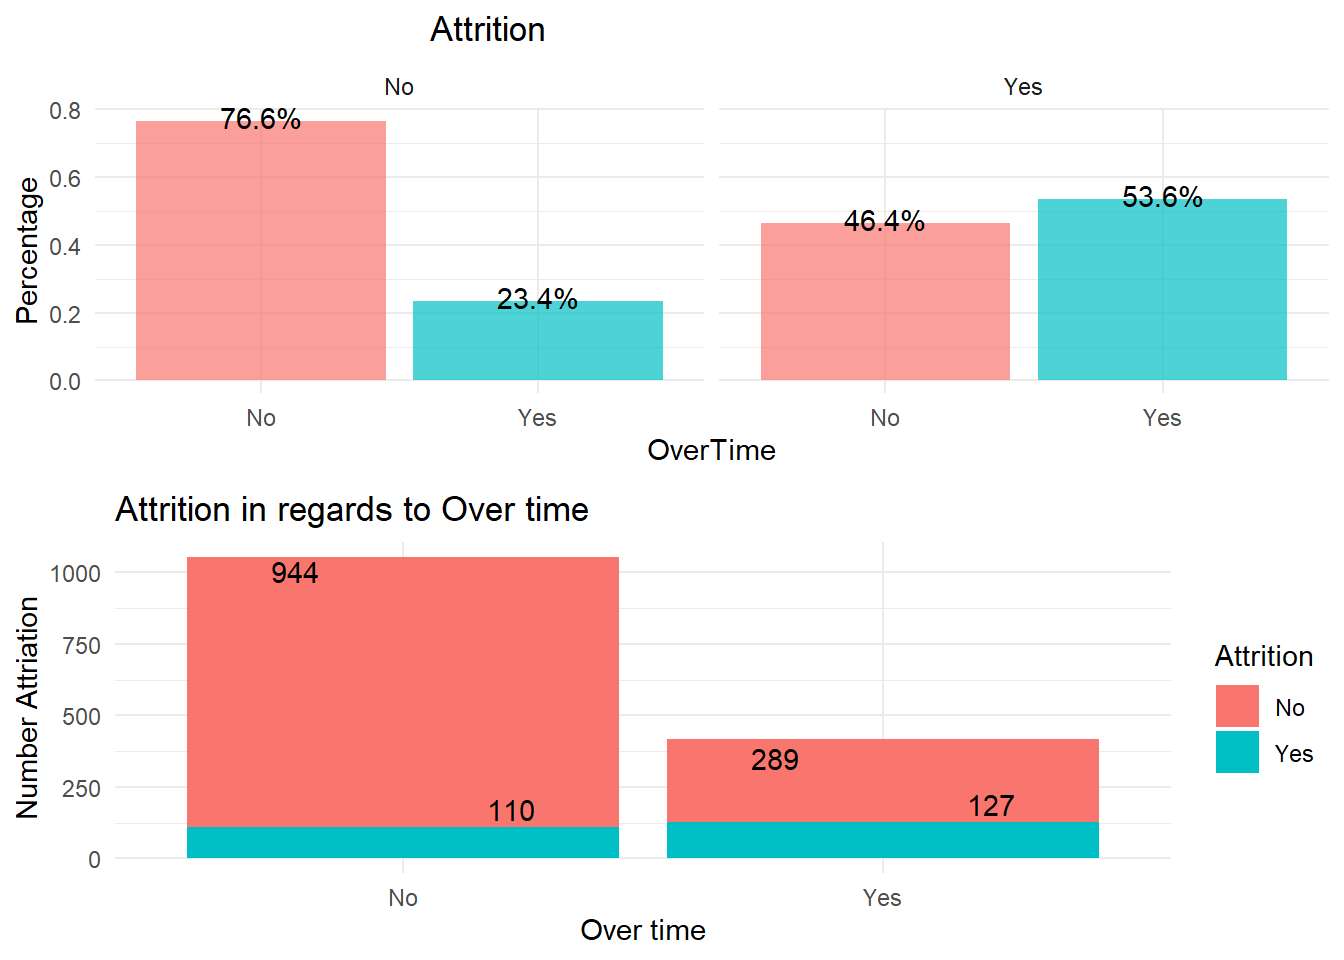

``` r
g1<-myData %>%
        ggplot(aes(x = WorkLifeBalance, group = Attrition)) + 
        geom_bar(aes(y = ..prop.., fill = factor(..x..)), 
                 stat="count", 
                 alpha = 0.7) +
        geom_text(aes(label = scales::percent(..prop..), y = ..prop.. ), 
                  stat= "count", 
                  vjust = -.5) +
        labs(y = "Percentage", fill= "WorkLifeBalance") +
        facet_grid(~Attrition) +
        theme_minimal()+
        theme(legend.position = "none", plot.title = element_text(hjust = 0.5)) + 
        ggtitle("Attrition")

g2<- myData %>%
        group_by(WorkLifeBalance, Attrition) %>%
        tally() %>%
        ggplot(aes(x = WorkLifeBalance, y = n,fill=Attrition)) +
        geom_bar(stat = "identity") +
        theme_minimal()+
        geom_text(aes(label = n), vjust = -0.5, position = position_dodge(0.9))+
        labs(x="  Work Life Balance", y="Number Attriation")+
        ggtitle("Attrition in regards to  Work Life Balance")
grid.arrange(g1,g2)
```

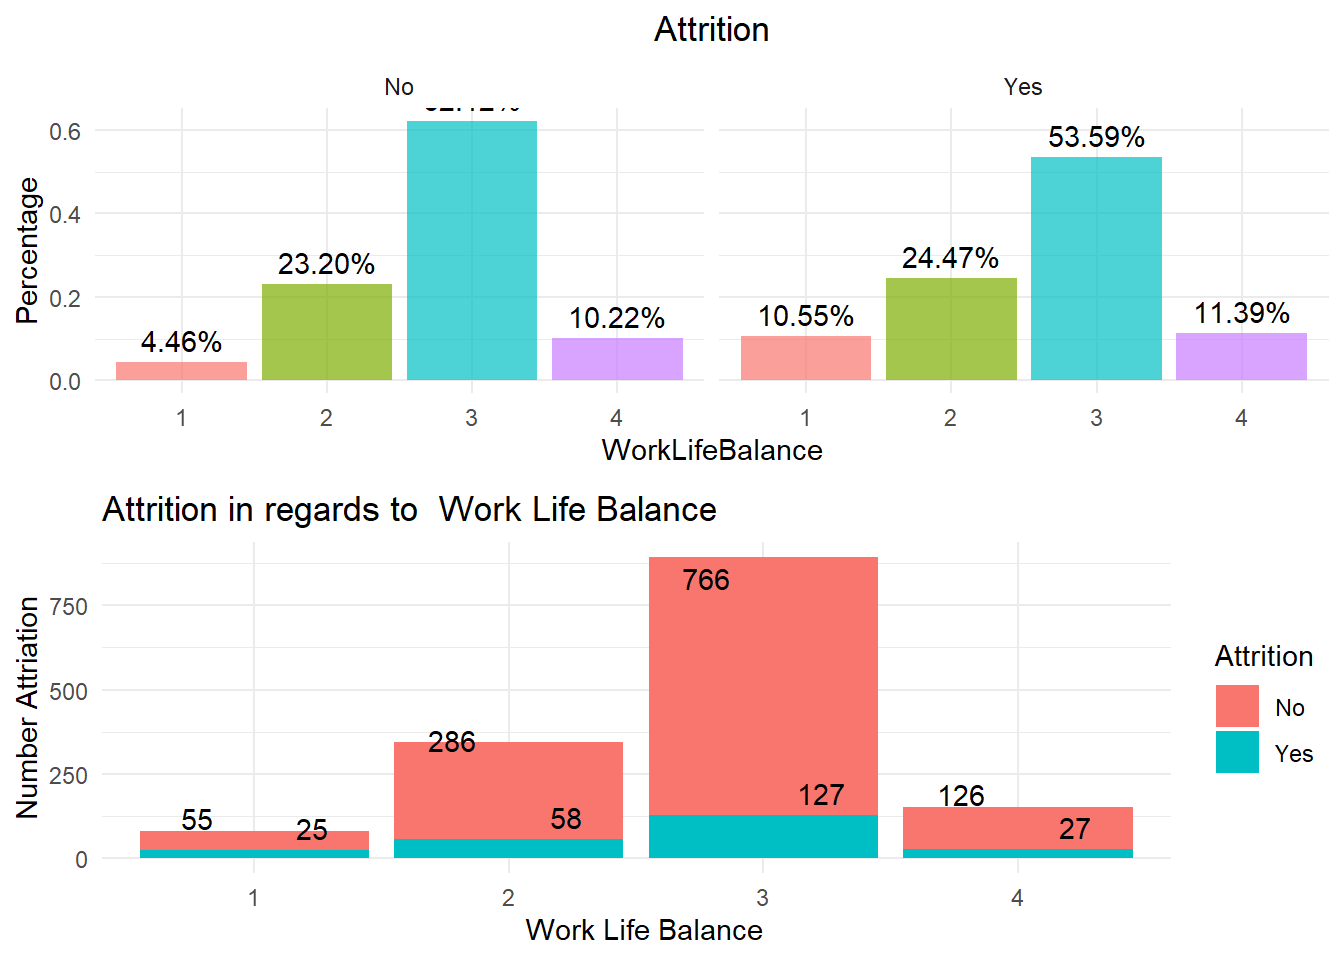 —————————–Using Raw data by RF—————————– At the first
Stage we use RF for getting some information about the prediction split
Data to Train and Test:

``` r
rfData <- myData
set.seed(123)
indexes = sample(1:nrow(rfData), size=0.8*nrow(rfData))
RFRaw.train.Data <- rfData[indexes,]
RFRaw.test.Data <- rfData[-indexes,]
```

Builidng the model

``` r
Raw.rf.model <- randomForest(Attrition~.,RFRaw.train.Data, importance=TRUE,ntree=1000)
```

``` r
varImpPlot(Raw.rf.model)
```

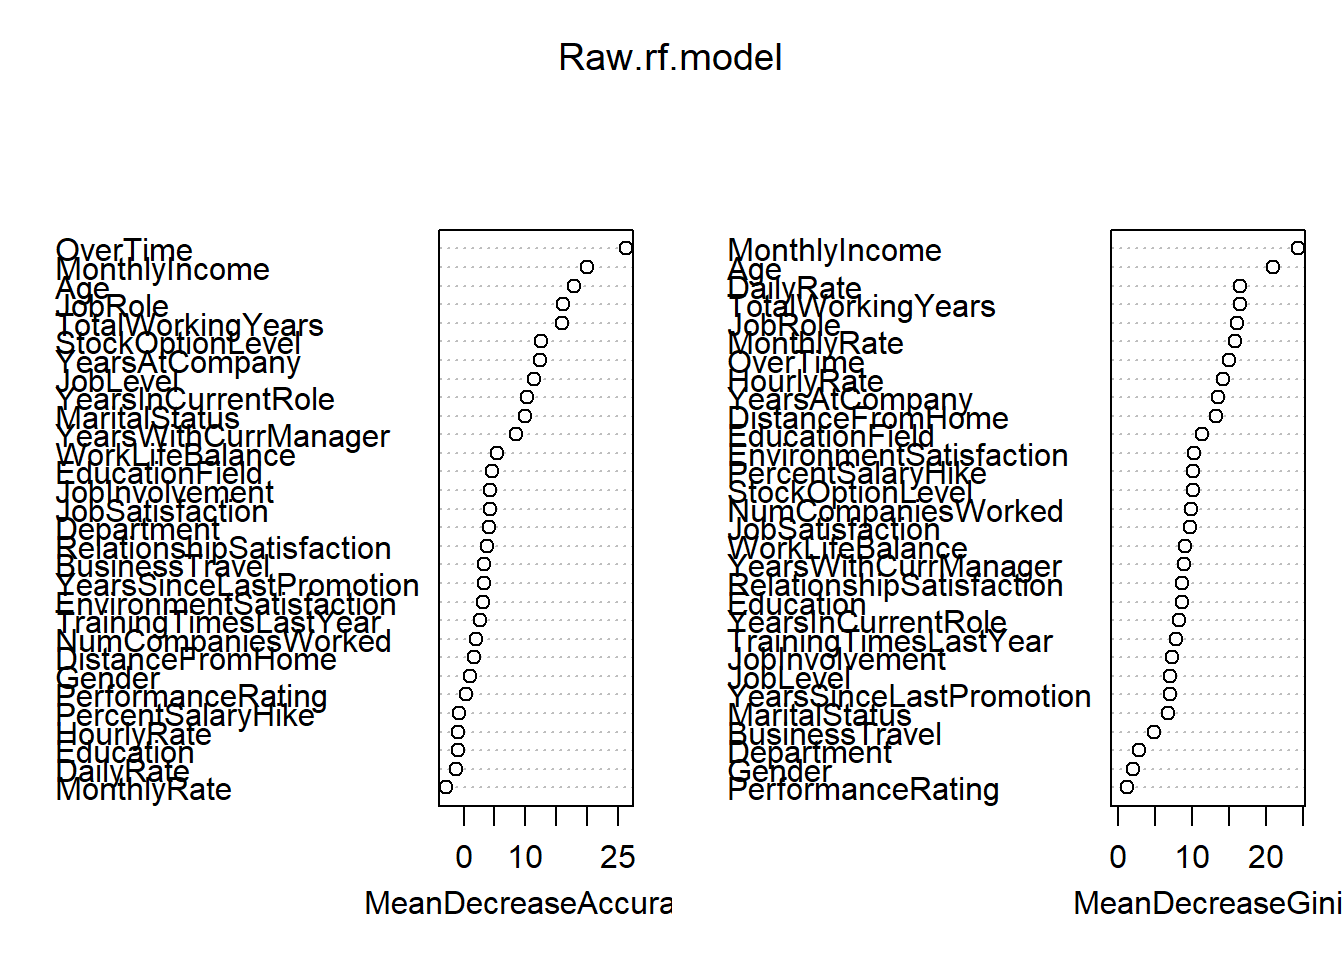 As we see here, Over time, Age, MonthlyIncome, Jobrole
and TotalWorkingYears are top five variables.

``` r
Raw.rf.prd <- predict(Raw.rf.model, newdata = RFRaw.test.Data)
confusionMatrix(RFRaw.test.Data$Attrition, Raw.rf.prd)
```

    ## Confusion Matrix and Statistics
    ## 
    ##           Reference
    ## Prediction  No Yes
    ##        No  244   2
    ##        Yes  40   8
    ##                                           
    ##                Accuracy : 0.8571          
    ##                  95% CI : (0.8118, 0.8951)
    ##     No Information Rate : 0.966           
    ##     P-Value [Acc > NIR] : 1               
    ##                                           
    ##                   Kappa : 0.2327          
    ##                                           
    ##  Mcnemar's Test P-Value : 1.135e-08       
    ##                                           
    ##             Sensitivity : 0.8592          
    ##             Specificity : 0.8000          
    ##          Pos Pred Value : 0.9919          
    ##          Neg Pred Value : 0.1667          
    ##              Prevalence : 0.9660          
    ##          Detection Rate : 0.8299          
    ##    Detection Prevalence : 0.8367          
    ##       Balanced Accuracy : 0.8296          
    ##                                           
    ##        'Positive' Class : No              
    ## 

``` r
Raw.rf.plot<- plot.roc(as.numeric(RFRaw.test.Data$Attrition), as.numeric(Raw.rf.prd),lwd=2, type="b",print.auc=TRUE,col ="blue")
```

    ## Setting levels: control = 1, case = 2

    ## Setting direction: controls < cases

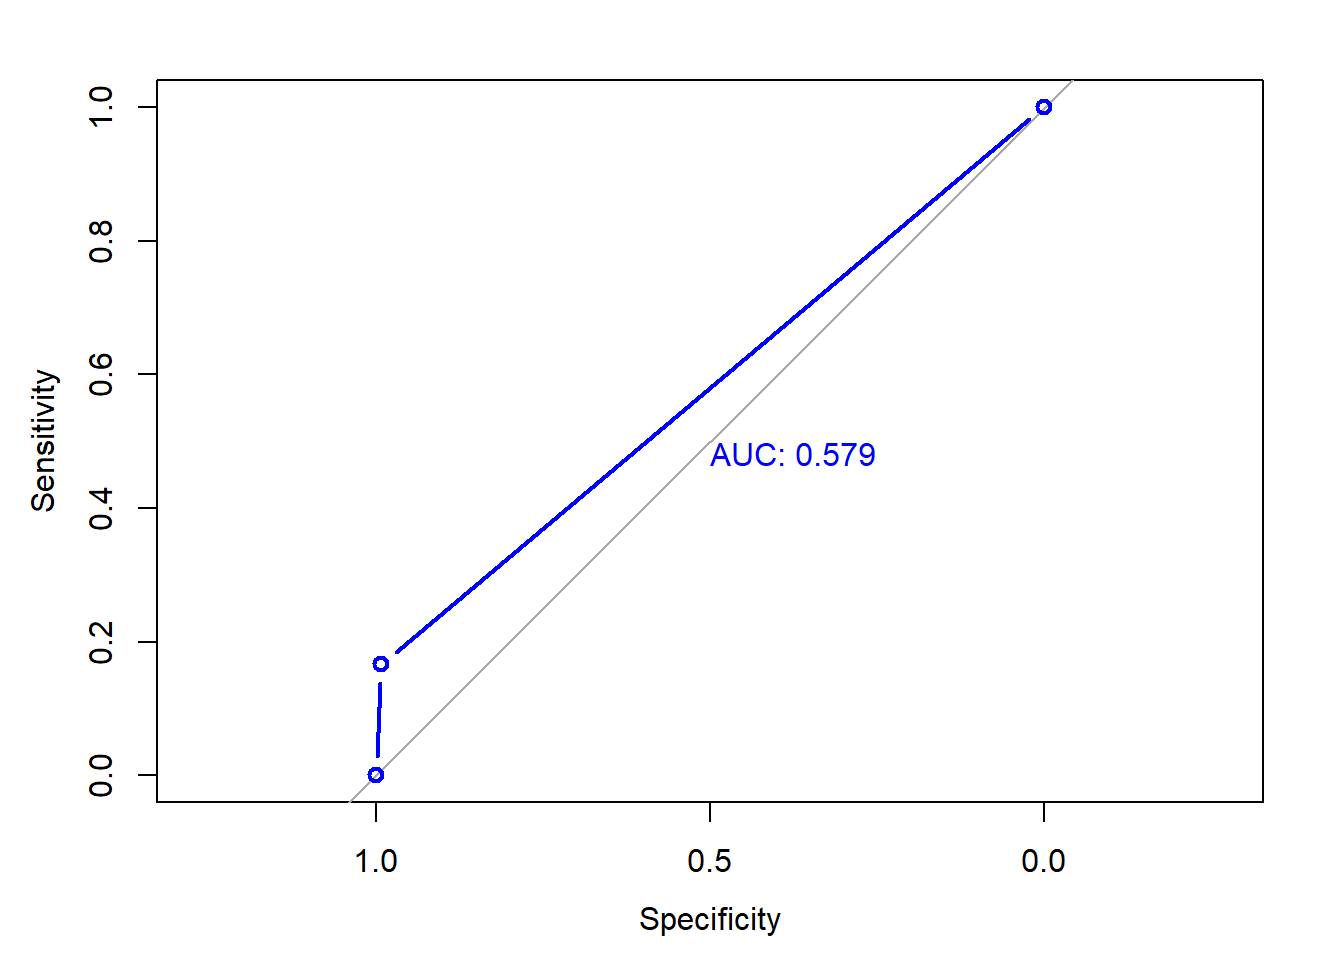

Acc = 0.8639 which is very good result but not anough measure. We see
that the AUC is poor.

——————————————–Decision Tree——————————————–

``` r
DtData <- myData
set.seed(123)
indexes = sample(1:nrow(DtData), size=0.8*nrow(DtData))
DTtrain.Data <- DtData[indexes,]
DTtest.Data <- DtData[-indexes,]

dtree.model <- tree::tree (Attrition ~., data = DTtrain.Data)
plot(dtree.model)
text(dtree.model, all = T)
```

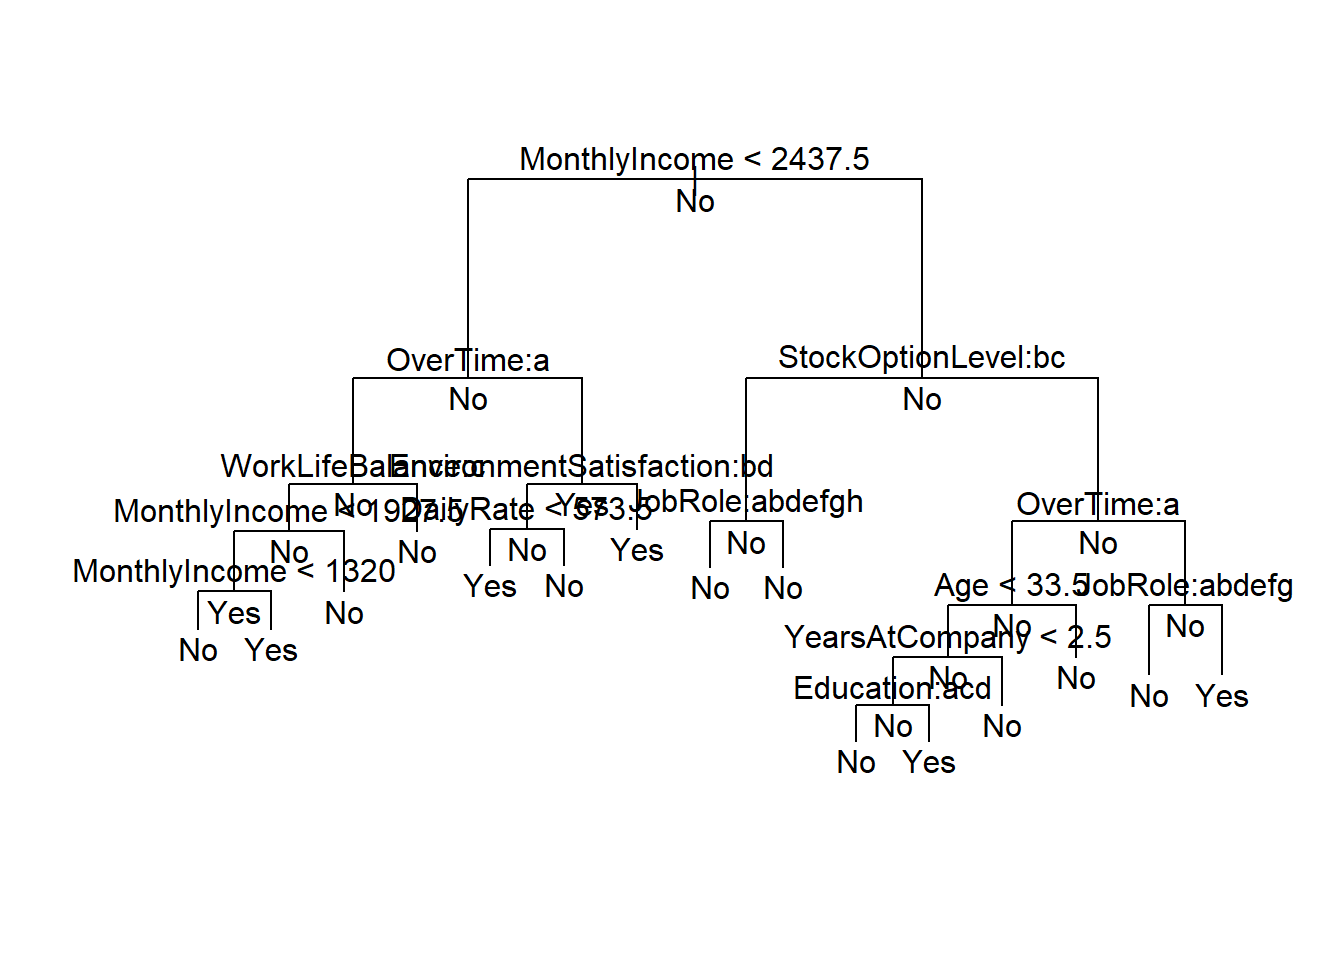

``` r
dtree.prd <- predict(dtree.model, DTtest.Data, type = "class")
confusionMatrix(dtree.prd,DTtest.Data$Attrition)
```

    ## Confusion Matrix and Statistics
    ## 
    ##           Reference
    ## Prediction  No Yes
    ##        No  234  34
    ##        Yes  12  14
    ##                                           
    ##                Accuracy : 0.8435          
    ##                  95% CI : (0.7969, 0.8831)
    ##     No Information Rate : 0.8367          
    ##     P-Value [Acc > NIR] : 0.41302         
    ##                                           
    ##                   Kappa : 0.2978          
    ##                                           
    ##  Mcnemar's Test P-Value : 0.00196         
    ##                                           
    ##             Sensitivity : 0.9512          
    ##             Specificity : 0.2917          
    ##          Pos Pred Value : 0.8731          
    ##          Neg Pred Value : 0.5385          
    ##              Prevalence : 0.8367          
    ##          Detection Rate : 0.7959          
    ##    Detection Prevalence : 0.9116          
    ##       Balanced Accuracy : 0.6214          
    ##                                           
    ##        'Positive' Class : No              
    ## 

``` r
dtree.plot <- plot.roc (as.numeric(DTtest.Data$Attrition), as.numeric(dtree.prd),lwd=2, type="b", print.auc=TRUE, col ="blue")
```

    ## Setting levels: control = 1, case = 2

    ## Setting direction: controls < cases

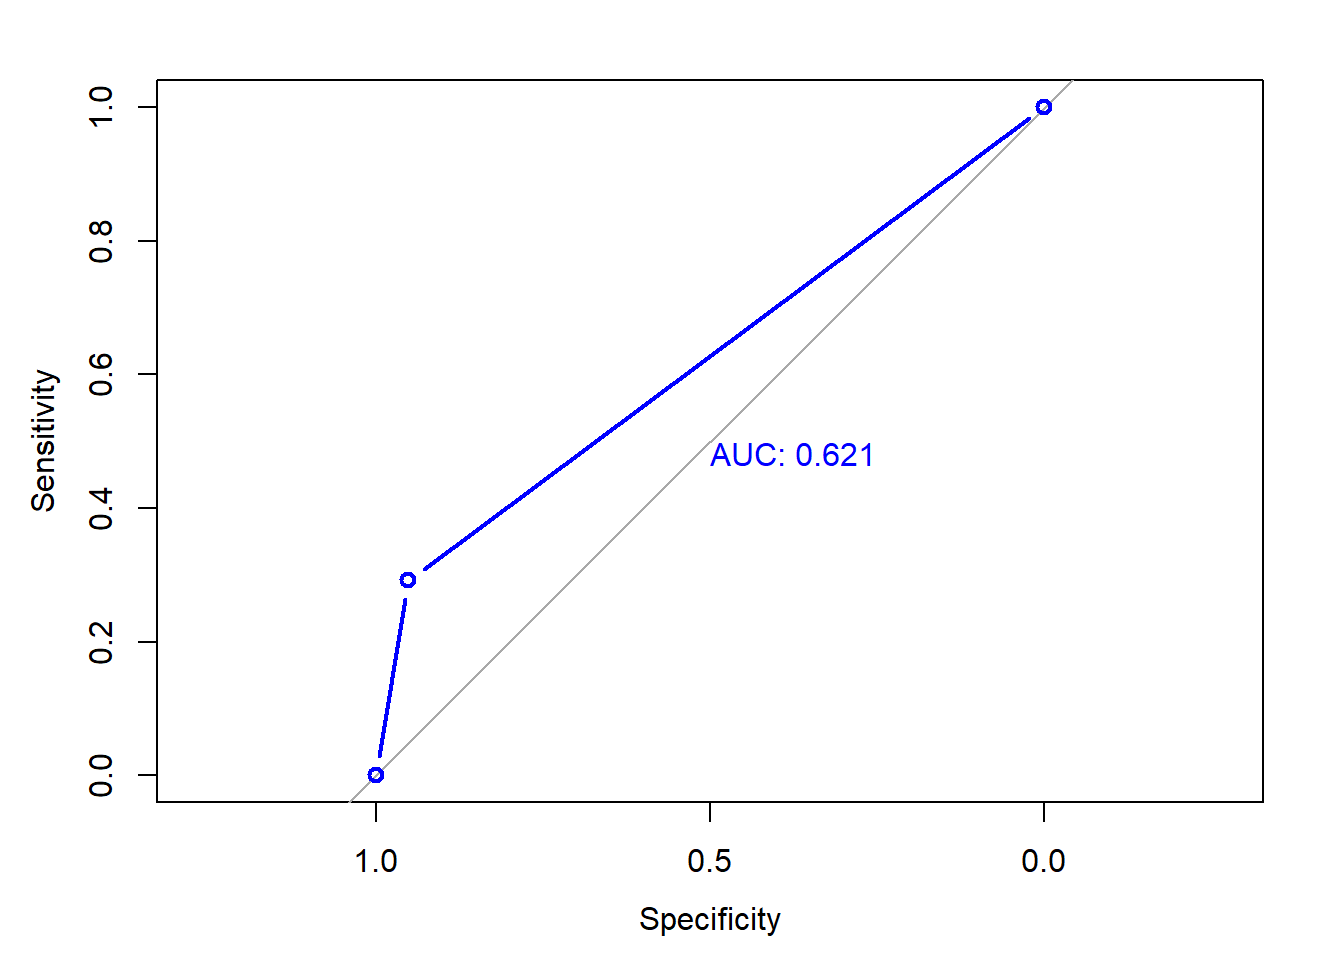 Accuracy is 0.823 where AUC is 0.608

——————————————–Feature Engineering——————————————– Making Age Group 18-24
= Young , 25-54=Middle-Age , 54-120= Adult

``` r
myData$AgeGroup <- as.factor(
        ifelse(myData$Age<=24,"Young", ifelse(
        myData$Age<=54,"Middle-Age","Adult"
        ))
)
table(myData$AgeGroup)
```

    ## 
    ##      Adult Middle-Age      Young 
    ##         69       1304         97

Totla Satisfaction the total of the satisfaction from Job, Environment,
etc.

``` r
myData$TotlaSatisfaction <- 
        as.numeric(myData$EnvironmentSatisfaction)+
        as.numeric(myData$JobInvolvement)+
        as.numeric(myData$JobSatisfaction)+
        as.numeric(myData$RelationshipSatisfaction)+
        as.numeric(myData$WorkLifeBalance)

summary(myData$TotlaSatisfaction)
```

    ##    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    ##    6.00   12.00   14.00   13.65   15.00   20.00

Study Years for getting Education Level certificate

``` r
table(myData$Education)
```

    ## 
    ##   1   2   3   4   5 
    ## 170 282 572 398  48

``` r
myData$YearsEducation <-  ifelse(myData$Education==1,10,ifelse(myData$Education==2,12,
        ifelse(myData$Education==3,16,ifelse(myData$Education==4,18,22))))  

table(myData$YearsEducation)
```

    ## 
    ##  10  12  16  18  22 
    ## 170 282 572 398  48

The majority of employee are 16 years education (Bachelor)

Less or more than average Monthly Income We calculate the average income
and generate the level of incom(High or Low)

``` r
myData$IncomeLevel <- as.factor(
        ifelse(myData$MonthlyIncome<ave(myData$MonthlyIncome),"Low","High")
)
table(myData$IncomeLevel)
```

    ## 
    ## High  Low 
    ##  493  977

``` r
corrplot(cor(sapply(myData,as.integer)),method = "pie")
```

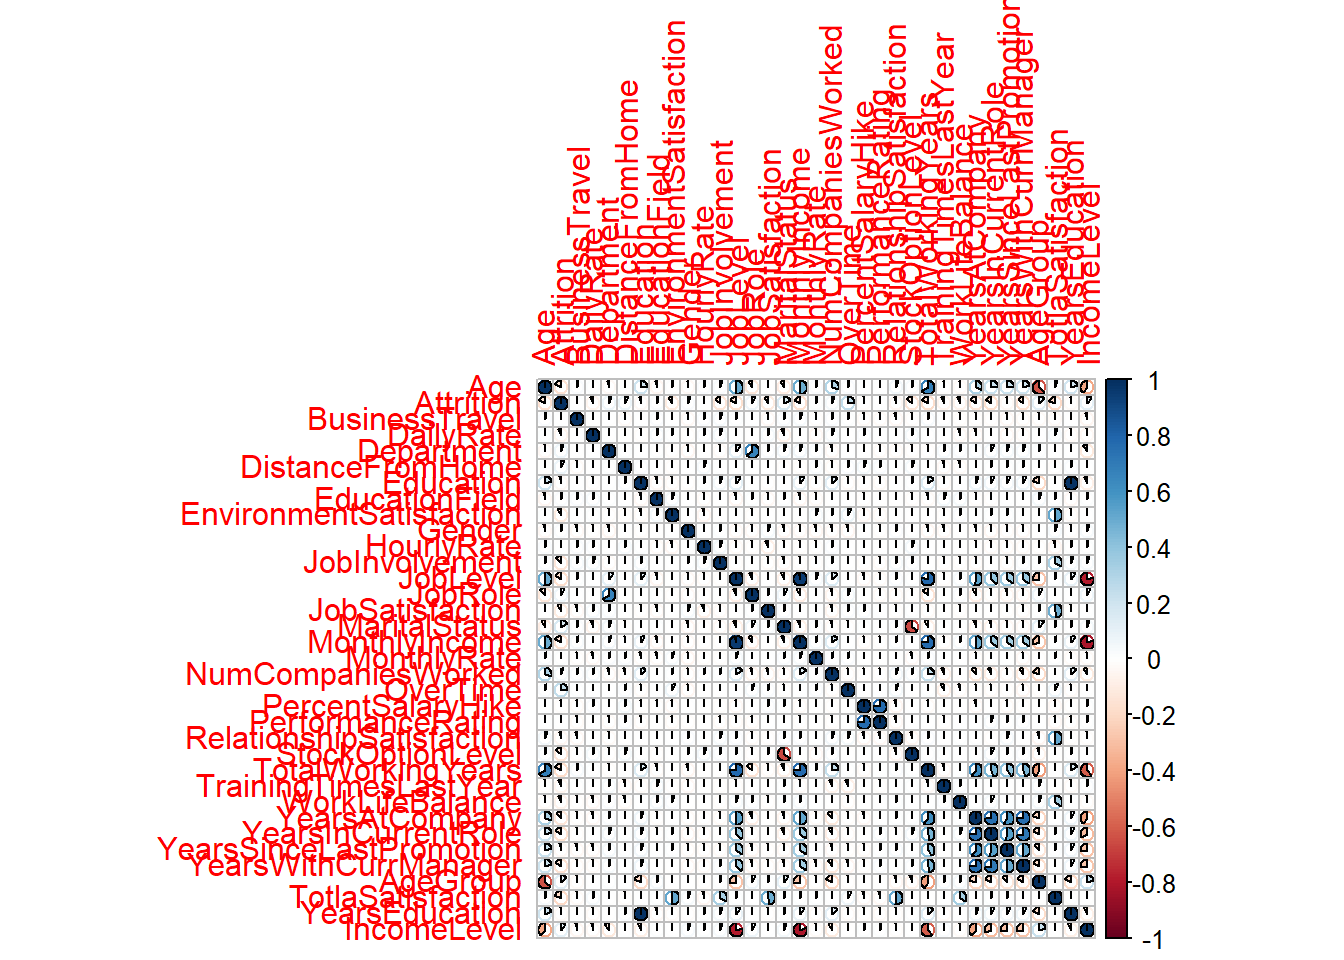 We can see some of variables are high correlated Eg.
JobLevel and MonthlyIncome Education and YearsEducation They cause
multicollinearity problem.